In [7]:
pwd

'/content'

In [8]:
cd news-classifier/

/content/news-classifier


In [5]:
!git clone https://github.com/csivitu/news-classifier.git

Cloning into 'news-classifier'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 4), reused 13 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 26.22 MiB | 13.48 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [1]:
!pip install pandas scikit-learn nltk

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time

nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [11]:
file_path = 'News_Category_Dataset_v3.json'
df2 = pd.read_json(file_path, lines=True)
print (df2)
df2['text'] = df2['headline'] + " " + df2['short_description']
print (df2)
df2 = df2[['category', 'text']]

                                                     link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Do

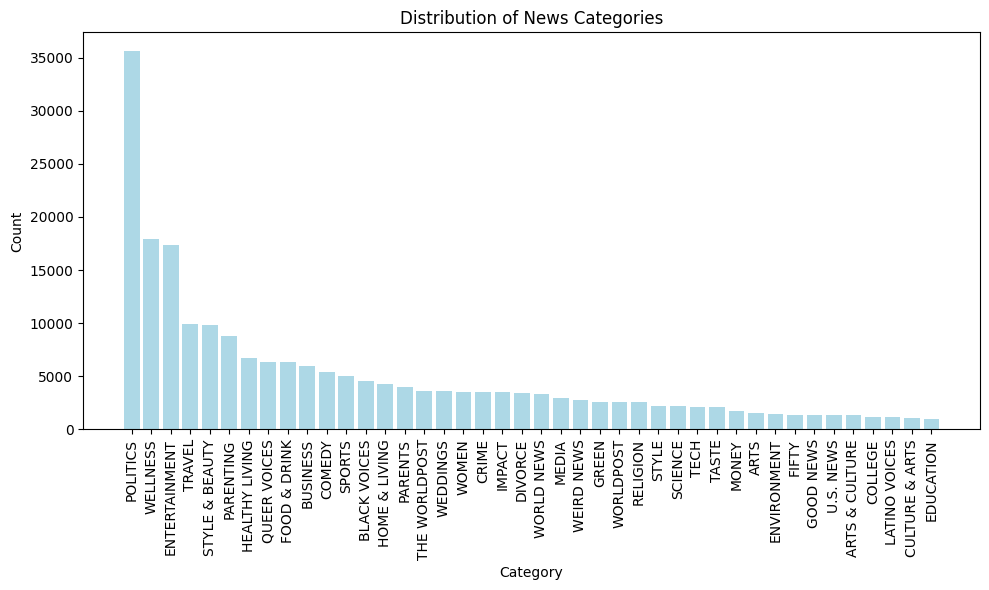

In [17]:
import matplotlib.pyplot as plt

category_counts = df2['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='lightblue')

plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of News Categories')

plt.tight_layout()
plt.show()

In [10]:
print (df2)

         category                                               text
0       U.S. NEWS  Over 4 Million Americans Roll Up Sleeves For O...
1       U.S. NEWS  American Airlines Flyer Charged, Banned For Li...
2          COMEDY  23 Of The Funniest Tweets About Cats And Dogs ...
3       PARENTING  The Funniest Tweets From Parents This Week (Se...
4       U.S. NEWS  Woman Who Called Cops On Black Bird-Watcher Lo...
...           ...                                                ...
209522       TECH  RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523     SPORTS  Maria Sharapova Stunned By Victoria Azarenka I...
209524     SPORTS  Giants Over Patriots, Jets Over Colts Among  M...
209525     SPORTS  Aldon Smith Arrested: 49ers Linebacker Busted ...
209526     SPORTS  Dwight Howard Rips Teammates After Magic Loss ...

[209527 rows x 2 columns]


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

df2['processed_text'] = df2['text'].apply(preprocess_text)
print(df2)

         category                                               text  \
0       U.S. NEWS  Over 4 Million Americans Roll Up Sleeves For O...   
1       U.S. NEWS  American Airlines Flyer Charged, Banned For Li...   
2          COMEDY  23 Of The Funniest Tweets About Cats And Dogs ...   
3       PARENTING  The Funniest Tweets From Parents This Week (Se...   
4       U.S. NEWS  Woman Who Called Cops On Black Bird-Watcher Lo...   
...           ...                                                ...   
209522       TECH  RIM CEO Thorsten Heins' 'Significant' Plans Fo...   
209523     SPORTS  Maria Sharapova Stunned By Victoria Azarenka I...   
209524     SPORTS  Giants Over Patriots, Jets Over Colts Among  M...   
209525     SPORTS  Aldon Smith Arrested: 49ers Linebacker Busted ...   
209526     SPORTS  Dwight Howard Rips Teammates After Magic Loss ...   

                                           processed_text  
0       million americans roll sleeves covid boosters ...  
1       america

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df2['processed_text'], df2['category'], test_size=0.2)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB()),
])

In [16]:
print("Training the model...")
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

print("Making predictions...")
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Training the model...
Training completed in 6.98 seconds (0.12 minutes)
Making predictions...
Accuracy: 0.5129

Classification Report:
                precision    recall  f1-score   support

          ARTS       0.41      0.03      0.05       319
ARTS & CULTURE       0.33      0.01      0.02       254
  BLACK VOICES       0.59      0.12      0.20       939
      BUSINESS       0.48      0.29      0.36      1250
       COLLEGE       0.47      0.03      0.06       224
        COMEDY       0.63      0.25      0.35      1072
         CRIME       0.50      0.53      0.51       720
CULTURE & ARTS       0.57      0.02      0.04       210
       DIVORCE       0.85      0.49      0.62       673
     EDUCATION       0.50      0.02      0.04       214
 ENTERTAINMENT       0.46      0.75      0.57      3517
   ENVIRONMENT       0.92      0.08      0.15       280
         FIFTY       1.00      0.00      0.01       266
  FOOD & DRINK       0.56      0.72      0.63      1217
     GOOD NEWS       0.4